In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import Tehnical
import dask.dataframe as dd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_df(name):
    df = pd.read_csv('/home/filip/Desktop/Ruđer/MinuteData/'+name+'USD.csv_1-min_data.csv')
    df["Timestamp"] = df["Timestamp"].astype('M8[s]')
    df = df.loc[df["Timestamp"]>"2014-01-01 01:00:00"]
    cols = []
    for col in df.columns:
        if str(col)!="Timestamp":
            cols.append(str(col)+"_"+name)
        else:
            cols.append("Timestamp")
    df.columns = cols
    return df

In [4]:
coinbase = load_df("coinbase")
kraken = load_df("kraken")[["Price_kraken","Timestamp"]]
bitstamp = load_df("bitstamp")[["Price_bitstamp","Timestamp"]]
cex = load_df("cex")[["Price_cex","Timestamp"]]

In [5]:
combined = pd.DataFrame(pd.date_range(start ="2014-01-01 02:00:00", end ="2019-08-12 12:47:00", freq='T'))
combined.columns = ["Timestamp"]
combined = pd.merge(combined, coinbase, left_on='Timestamp', right_on='Timestamp', how='left')
combined = pd.merge(combined, bitstamp, left_on='Timestamp', right_on='Timestamp', how='left')
combined = pd.merge(combined, kraken, left_on='Timestamp', right_on='Timestamp', how='left')
combined = pd.merge(combined, cex, left_on='Timestamp', right_on='Timestamp', how='left')
print(combined.columns)
combined.tail()

Index(['Timestamp', 'High_coinbase', 'Low_coinbase', 'Trades_coinbase',
       'Std_coinbase', 'Price_coinbase', 'Open_coinbase', 'Close_coinbase',
       'Volume_coinbase', 'Volume_mean_coinbase', 'Price_bitstamp',
       'Price_kraken', 'Price_cex'],
      dtype='object')


,Timestamp,High_coinbase,Low_coinbase,Trades_coinbase,Std_coinbase,Price_coinbase,Open_coinbase,Close_coinbase,Volume_coinbase,Volume_mean_coinbase,Price_bitstamp,Price_kraken,Price_cex
2951203,2019-08-12 12:43:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2951204,2019-08-12 12:44:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2951205,2019-08-12 12:45:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2951206,2019-08-12 12:46:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2951207,2019-08-12 12:47:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [6]:
# Plota broj missing i existing podataka 
def plot_missing(df, column):
    missing = df.loc[df[column].isnull()]
    missing["Counter"] = 1
    vals = missing.set_index("Timestamp").groupby(pd.Grouper(freq='M')).count()["Counter"]
    vals.plot(x="Timestamp",y="Counter")
    found = df.loc[~df[column].isnull()]
    found["Counter"] = 1
    vals = found.set_index("Timestamp").groupby(pd.Grouper(freq='M')).count()["Counter"]
    vals.plot(x="Timestamp",y="Counter")
    plt.show()

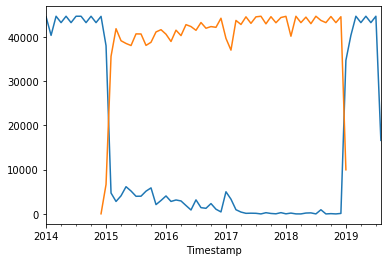

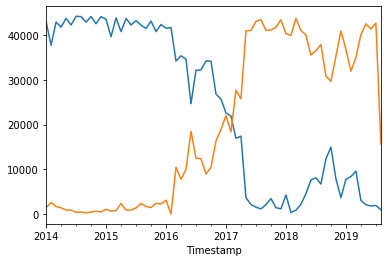

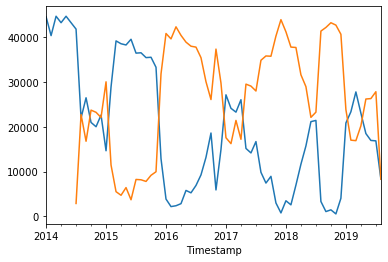

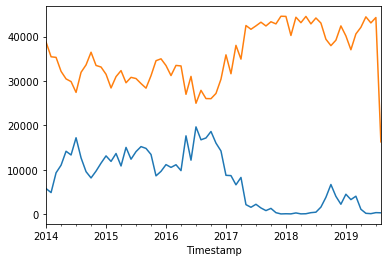

In [7]:
plot_missing(combined,"Price_coinbase")
plot_missing(combined,"Price_kraken")
plot_missing(combined,"Price_cex")
plot_missing(combined,"Price_bitstamp")

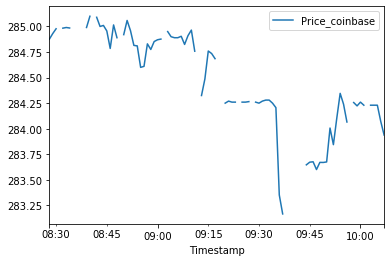

In [8]:
combined.tail(2000000).head(4000).tail(100).plot(x="Timestamp",y="Price_coinbase")

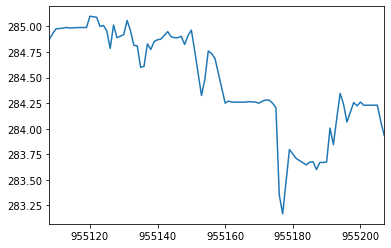

In [9]:
combined["Price_coinbase"].copy().interpolate().tail(2000000).head(4000).tail(100).plot(x="Timestamp",y="Price_coinbase")

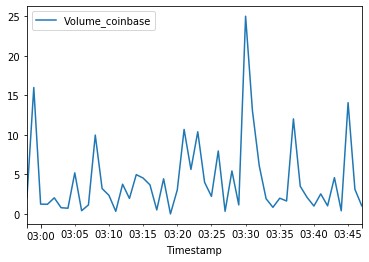

In [ ]:
combined.tail(2000000).head(5060).tail(50).plot(x="Timestamp",y="Volume_coinbase")

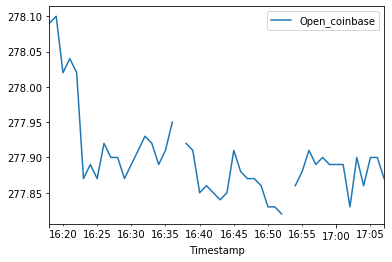

In [ ]:
combined.tail(2000000).head(100).tail(50).plot(x="Timestamp",y="Open_coinbase")

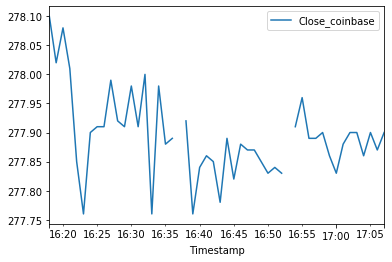

In [ ]:
combined.tail(2000000).head(100).tail(50).plot(x="Timestamp",y="Close_coinbase")

In [2]:
general = pd.read_pickle("/home/filip/Desktop/Ruđer/FinalData/general.pkl")
general.head()

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,Price_trades,Var_trades
1,736.98,8.17,736.98,742.75,731.20,2014-01-01 01:01:00,743.67,731.20,22.00,4.57,740.65,20.91
2,739.00,5.99,738.99,744.98,732.99,2014-01-01 01:02:00,744.98,732.98,10.00,4.05,734.79,16.38
3,739.41,9.08,739.41,745.84,732.99,2014-01-01 01:03:00,746.60,732.98,10.00,6.25,741.98,39.10
4,738.41,5.88,738.71,744.73,732.98,2014-01-01 01:04:00,746.60,732.98,31.00,4.81,741.84,23.15
5,741.75,4.60,741.75,745.00,738.50,2014-01-01 01:05:00,745.00,738.50,4.00,3.25,743.38,10.56


In [4]:
print(general.shape)
general.isnull().sum()

(2951267, 12)


Median_exchanges    0
Std_exchanges       0
Price_exchanges     0
High_exchanges      0
Low_exchanges       0
Timestamp           0
High_trades         0
Low_trades          0
Trades_trades       0
Std_trades          0
Price_trades        0
Var_trades          0
dtype: int64

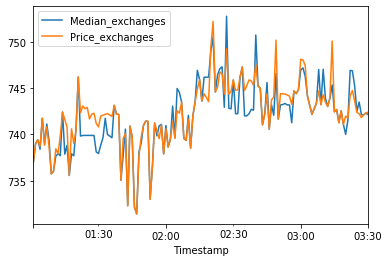

In [5]:
general.head(150).plot(x="Timestamp",y=["Median_exchanges","Price_exchanges"])

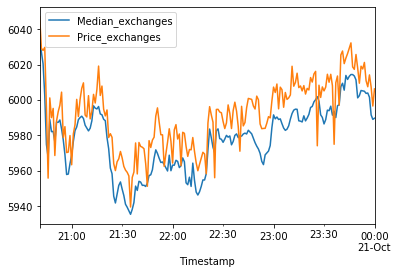

In [6]:
general.head(2000100).tail(200).plot(x="Timestamp",y=["Median_exchanges","Price_exchanges"])

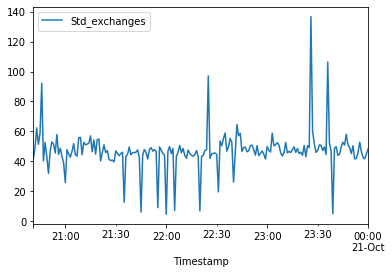

In [7]:
general.head(2000100).tail(200).plot(x="Timestamp",y=["Std_exchanges"])

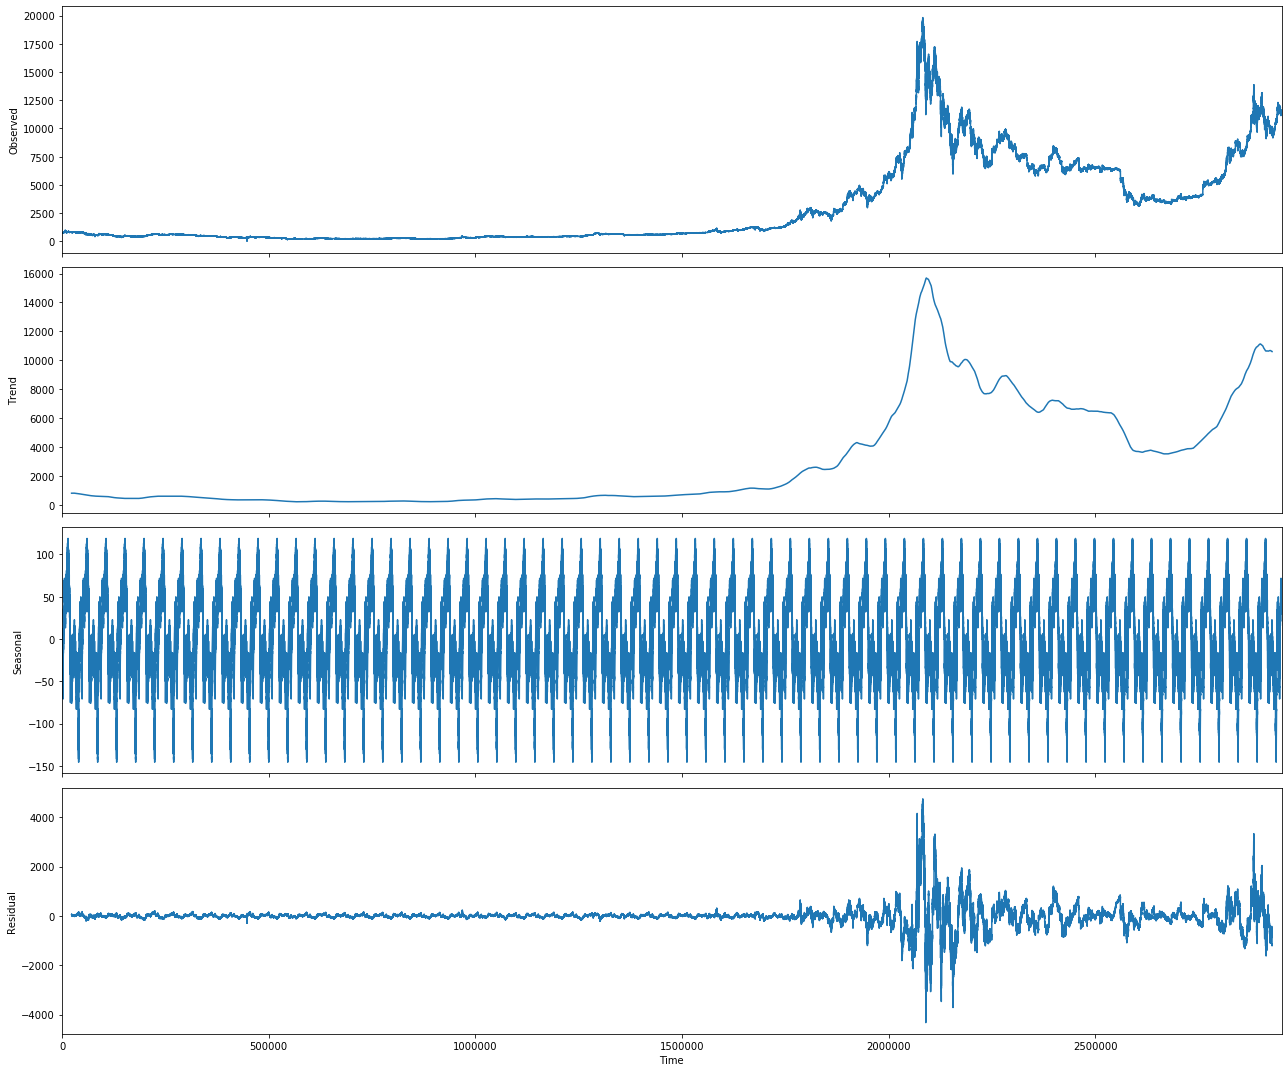

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(general["Median_exchanges"].values, model='additive', freq=46000)
plt.rc("figure", figsize=(18,15))
fig = result.plot()

In [4]:
general["Trend"] = result.trend
general["Seasonal"] = result.seasonal
general["Residual"] = result.resid

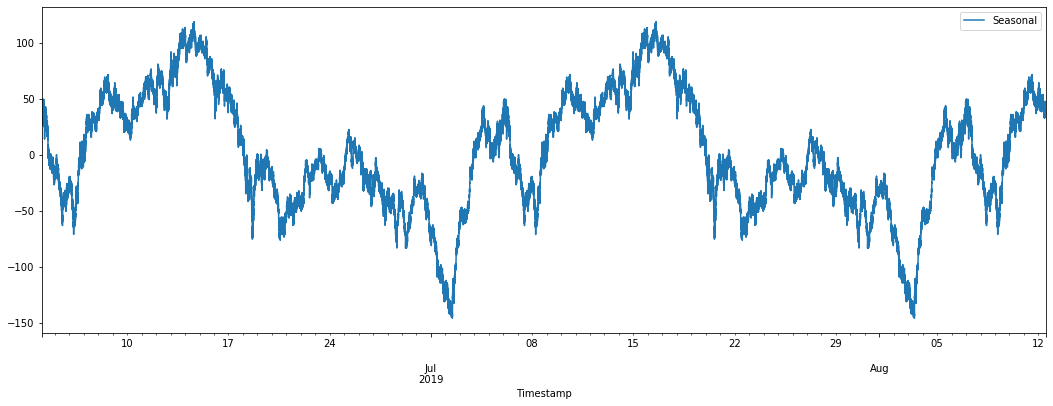

In [11]:
general.tail(100000).plot(x="Timestamp",y=["Seasonal"], figsize=(18,6))

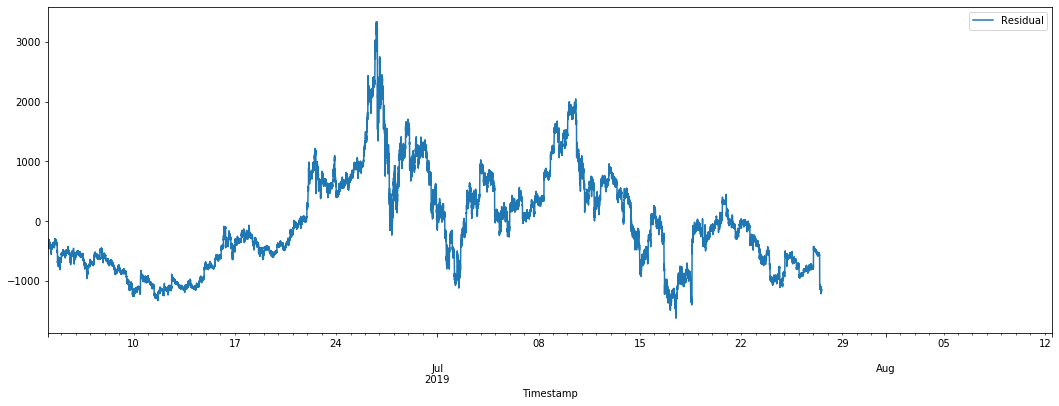

In [10]:
general.tail(100000).plot(x="Timestamp",y=["Residual"], figsize=(18,6))

In [4]:
distinct = pd.read_pickle("/home/filip/Desktop/Ruđer/FinalData/distinct.pkl")
distinct.head()

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,...,Var_trades,High,Low,Trades,Std,Price,Open,Close,Volume,Volume_mean
573061,238.00,1.81,238.46,241.90,237.00,2015-02-03 00:02:00,241.90,237.00,67.00,0.61,...,0.37,237.01,237.00,2.00,0.01,237.00,237.01,237.00,0.52,0.26
573062,237.68,2.35,238.61,242.10,236.97,2015-02-03 00:03:00,242.10,236.85,55.00,0.71,...,0.50,236.99,236.94,5.00,0.02,236.97,236.94,236.97,8.40,1.68
573063,237.83,1.63,238.14,241.84,236.61,2015-02-03 00:04:00,241.90,236.61,52.00,1.33,...,1.76,236.97,236.97,4.00,0.00,236.97,236.97,236.97,4.35,1.09
573064,237.18,2.04,238.11,241.70,236.91,2015-02-03 00:05:00,241.70,236.51,31.00,0.87,...,0.76,236.94,236.90,5.00,0.02,236.91,236.91,236.94,3.71,0.74
573065,238.15,1.54,238.51,241.73,236.91,2015-02-03 00:06:00,241.80,236.90,47.00,1.00,...,0.99,236.94,236.90,3.00,0.02,236.91,236.90,236.94,12.00,4.00
